# Modelos matemáticos

Un modelo matemático general se define como

\begin{equation}
    \text{variable dependiente} = f(\text{variables independientes}, \text{parámetros}, \text{funciones de fuerza})
\end{equation}

donde la *variable dependiente* es una característica que refleja el comportamiento o estado de un sistema, las *variables independientes* son comunmente dimensiones (tiempo, espacio), los *parámetros* se refieren a las propiedades o componentes del sistema y las *funciones de fuerza* son influencias externas u otros modelos. 

### Solución analítica de modelos matemáticos

La mayoria de los modelos matemáticos no pueden resolverse analíticamente, tomemos como ejemplo la segunda ley del movimiento

\begin{equation}
    F = m a
\end{equation}

puede reordenarse como

\begin{equation}
    a = \frac{F}{m}
\end{equation}

donde $a$ es la *variable dependiente*, explícitamente no existe *variable independiente*, $m$ es un *parámetro* y $F$ es una *función de fuerza*.

Si planteamos el anterior modelo como una ecuación diferencial para un cuerpo en caída libre

\begin{equation}
    \frac{d v}{d t} = \frac{F}{m}
\end{equation}

y $F$ como la suma de dos fuerzas opuestas

\begin{equation}
    F = F_{u} + F_{d}
\end{equation}

si a la fuerza hacia abajo se le asigna el signo positivo

\begin{equation}
    F_{d} = m g
\end{equation}

entonces la fuerza debido a la resistencia del aire es

\begin{equation}
    F_{u} = -c v
\end{equation}

reemplazando todos los términos conocidos tenemos

\begin{equation}
    \frac{d v}{d t} = g - \frac{c v}{m}
\end{equation}

resolviendo para las condiciones $v = 0$ y $t = 0$

\begin{equation}
    v(t) = \frac{g m}{c} ( 1 - e^{-t \frac{c}{m}})
\end{equation}

donde $v(t)$ es la *variable dependiente*, $t$ es la *variable independiente*, $c$ y $m$ son *parámetros* y $g$ es una función de fuerza.

Para un cuerpo con masa $68.1 \ kg$. y coeficente de resistencia del aire $12.5 \ \frac{kg}{s}$ tenemos:

In [1]:
m = 68.1
c = 12.5
g = 9.81

println("t", '\t', "v")

for t = 0:20
    v = ((g * m) / c) * (1 - exp(-t * (c/m)))
    println(t, '\t', v)
end    

t	v
0	0.0
1	8.9623181081134
2	16.42172057920007
3	22.630235447165056
4	27.797627475567975
5	32.09848540102452
6	35.678120697377175
7	38.657477159967954
8	41.13721718829596
9	43.201122828759345
10	44.91892648723751
11	46.34866695173784
12	47.53865032716072
13	48.5290821355503
14	49.35342572499016
15	50.03953288319575
16	50.61058485542108
17	51.08587556049886
18	51.48146346724055
19	51.81071415589995
20	52.08475189602096


### Solución numérica aproximada de modelos matemáticos

El modelo anterior se resolverá mediante el *método de Euler*

\begin{equation}
    \frac{d v}{d t} \approx \frac{\Delta v}{\Delta t} = \frac{v(t_{i+1}) - v(t_{i})}{t_{i+1} - t_{i}} 
\end{equation}

reemplazando en la ecuación diferencial

\begin{equation}
    \frac{v(t_{i+1}) - v(t_{i})}{t_{i+1} - t_{i}} = g - \frac{c v(t_{i})}{m}
\end{equation}

despejando $v(t_{i+1})$

\begin{equation}
    v(t_{i+1}) = v(t_{i}) + (g - \frac{c}{m} v(t_{i})) (t_{i+1} - t_{i})
\end{equation}

In [2]:
m = 68.1
c = 12.5
g = 9.81
ti = 0
vi = 0

println("t", '\t', "v")
println(ti, '\t', vi)

for i = 1:20
    tf = ti + 1
    vf = vi + ((g - ((c / m) * vi)) * (tf  - ti))
    println(tf, '\t', vf)
    vi = vf
    ti = tf   
end

t	v
0	0
1	9.81
2	17.819339207048458
3	24.358535387839858
4	29.697438583904496
5	34.05636689082364
6	37.615198225107115
7	40.52079326455148
8	42.89305588119034
9	44.82988115997332
10	46.41119519081522
11	47.702253342280855
12	48.75633312526895
13	49.61693277187891
14	50.31956625721685
15	50.89322883849129
16	51.361593589135325
17	51.74398830478596
18	52.05619309465638
19	52.31109157214236
20	52.51920251705015


Comparamos las soluciones:

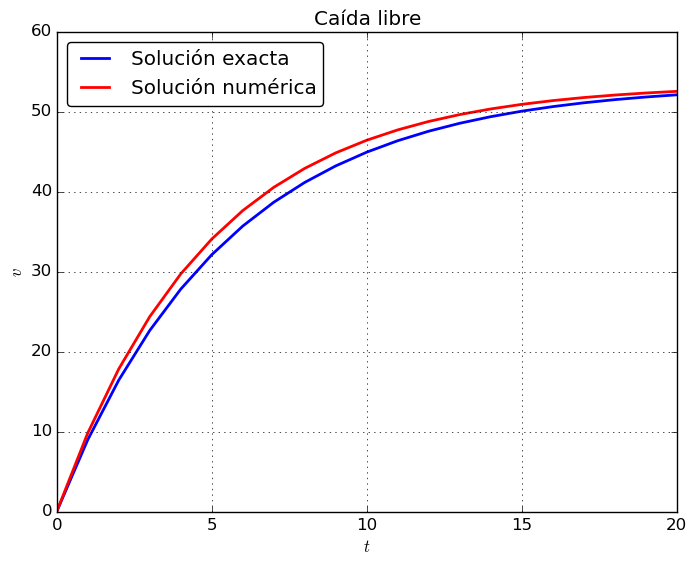

INFO: Loading help data...


In [3]:
using PyCall
using PyPlot

m = 68.1
c = 12.5
g = 9.81

ta = linspace(0,20,21)
va = zeros(21)

for i = 1:21
    va[i] = ((g * m) / c) * (1 - exp(-ta[i] * (c/m)))
end 

tn = zeros(21)
vn = zeros(21)

for i = 1:20
    tn[i+1] = tn[i] + 1
    vn[i+1] = vn[i] + ((g - ((c / m) * vn[i])) * (tn[i+1]  - tn[i]))
end

plot(ta, va, color="blue", linewidth=2.0,label="Solución exacta")
plot(tn, vn, color="red", linewidth=2.0,label="Solución numérica")
xlabel(L"$t$")
ylabel(L"$v$")
legend(loc="upper left",fancybox="true")
title("Caída libre")
grid("on")